# ANÁLISIS EXPLORATORIO DE DATOS

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


In [2]:
eda = pd.read_csv('Wine_reviews_climate_prediction.csv')

In [3]:
eda.head(2)

,Unnamed: 0,country,description,points,price,taster_name,variety,winery,Year,region,Latitude,Longitude,Lat_x,Long_x,temp_anual,temp_max_anual,temp_min_anual,pre_anual,etp_anual
0,0,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Roger Voss,Portuguese Red,Quinta dos Avidagos,2011,"Douro, Portugal",41.501277,-5.512293,41.75,-5.75,13.01,19.44,6.61,388.5,1200
1,1,Portugal,This is a solid mineral and tannin dominated w...,87,15.0,Roger Voss,Portuguese Red,Quinta Nova de Nossa Senhora do Carmo,2011,"Douro, Portugal",41.501277,-5.512293,41.75,-5.75,13.01,19.44,6.61,388.5,1200


In [4]:
eda.drop(columns = 'Unnamed: 0', inplace = True)

In [5]:
eda.describe()

,points,price,Year,Latitude,Longitude,Lat_x,Long_x,temp_anual,temp_max_anual,temp_min_anual,pre_anual,etp_anual
count,70030.000000,70030.000000,70030.000000,70030.000000,70030.000000,70030.000000,70030.000000,70030.000000,70030.000000,70030.000000,70030.000000,70030.000000
mean,88.313965,37.902842,2009.066700,32.207944,-57.070680,32.218406,-57.084014,12.988201,18.630808,7.390167,779.388079,1046.453506
std,3.152205,42.478364,2.633592,25.286495,68.902915,25.272598,68.881388,3.041957,3.436978,3.163644,362.493279,224.314619
min,80.000000,4.000000,2000.000000,-45.152671,-123.869509,-45.250000,-123.750000,-0.880000,2.750000,-9.800000,9.000000,378.000000
25%,86.000000,18.000000,2007.000000,37.431573,-121.768473,37.250000,-121.750000,11.000000,16.380000,5.770000,517.400000,894.000000
50%,88.000000,28.000000,2010.000000,39.550019,-74.106809,39.750000,-74.250000,13.610000,18.870000,7.520000,737.400000,1047.000000
75%,91.000000,45.000000,2011.000000,44.608803,4.968739,44.750000,4.750000,14.510000,20.820000,9.320000,995.800000,1203.000000
max,100.000000,2500.000000,2012.000000,52.355518,176.580447,52.250000,176.750000,26.910000,33.090000,21.700000,2791.700000,2106.000000


In [6]:
eda.price.median()

28.0

In [7]:
eda.quantile([0.25, 0.5, 0.75, 0.90, 0.95, 0.99, 0.999]).T

,0.250,0.500,0.750,0.900,0.950,0.990,0.999
points,86.000000,88.000000,91.000000,92.000000,93.000000,95.000000,98.000000
price,18.000000,28.000000,45.000000,70.000000,90.000000,170.000000,495.971000
Year,2007.000000,2010.000000,2011.000000,2012.000000,2012.000000,2012.000000,2012.000000
Latitude,37.431573,39.550019,44.608803,47.185496,48.922066,49.167179,49.999982
Longitude,-121.768473,-74.106809,4.968739,13.438436,18.880768,169.398845,175.459548
Lat_x,37.250000,39.750000,44.750000,47.250000,48.750000,49.250000,49.750000
Long_x,-121.750000,-74.250000,4.750000,13.250000,18.750000,169.250000,175.250000
temp_anual,11.000000,13.610000,14.510000,16.410000,17.190000,20.605500,25.450000
temp_max_anual,16.380000,18.870000,20.820000,22.810000,23.800000,27.190000,29.740000
temp_min_anual,5.770000,7.520000,9.320000,10.550000,11.940000,14.327100,21.600000


In [8]:
eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70030 entries, 0 to 70029
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         70030 non-null  object 
 1   description     70030 non-null  object 
 2   points          70030 non-null  int64  
 3   price           70030 non-null  float64
 4   taster_name     70030 non-null  object 
 5   variety         70030 non-null  object 
 6   winery          70030 non-null  object 
 7   Year            70030 non-null  int64  
 8   region          70030 non-null  object 
 9   Latitude        70030 non-null  float64
 10  Longitude       70030 non-null  float64
 11  Lat_x           70030 non-null  float64
 12  Long_x          70030 non-null  float64
 13  temp_anual      70030 non-null  float64
 14  temp_max_anual  70030 non-null  float64
 15  temp_min_anual  70030 non-null  float64
 16  pre_anual       70030 non-null  float64
 17  etp_anual       70030 non-null 

In [9]:
eda.price.quantile([0.25, 0.5, 0.75, 0.90, 0.95, 0.99, 0.999])

0.250     18.000
0.500     28.000
0.750     45.000
0.900     70.000
0.950     90.000
0.990    170.000
0.999    495.971
Name: price, dtype: float64

(0.0, 160.0)

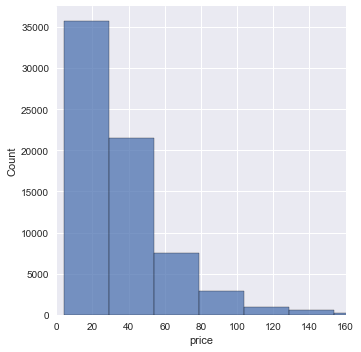

In [10]:
plt.style.use('seaborn')

sns.displot(eda.price, bins = 100);
plt.xlim(0,160)

**Conclusion** El 99% de los datos los tenemos con un precio inferior a $160

In [12]:
eda.points.quantile([0.25, 0.5, 0.75, 0.90, 0.95, 0.99, 0.999, 0.99999])

0.25000     86.0
0.50000     88.0
0.75000     91.0
0.90000     92.0
0.95000     93.0
0.99000     95.0
0.99900     98.0
0.99999    100.0
Name: points, dtype: float64

(70.0, 110.0)

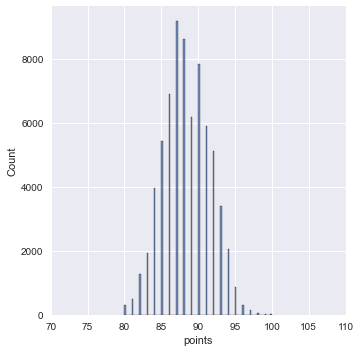

In [13]:
sns.displot(eda.points, bins = 100);
plt.xlim(70,110)

**Conclusion** El puntaje tiende a tener una distribución normal, como se puede apreciar en la gráfica.

In [14]:
rango = eda.loc[eda['points']>=95]
rango.describe()

,points,price,Year,Latitude,Longitude,Lat_x,Long_x,temp_anual,temp_max_anual,temp_min_anual,pre_anual,etp_anual
count,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000
mean,95.656118,144.466245,2008.772152,40.516026,-53.337276,40.529184,-53.379044,12.646484,18.133425,7.205788,793.571167,999.900844
std,1.039285,178.010223,2.476374,13.299387,67.735839,13.307921,67.695353,2.511397,2.789316,2.884023,314.139468,203.955238
min,95.000000,20.000000,2000.000000,-36.916667,-123.479454,-36.750000,-123.250000,0.510000,5.860000,-9.670000,95.500000,486.000000
25%,95.000000,65.000000,2007.000000,38.502469,-122.265389,38.750000,-122.250000,11.100000,16.080000,6.040000,604.900000,843.000000
50%,95.000000,90.000000,2009.000000,43.055860,-8.629105,43.250000,-8.750000,13.550000,18.400000,7.210000,765.500000,1002.000000
75%,96.000000,150.000000,2011.000000,46.035967,7.441624,46.250000,7.250000,14.270000,20.310000,9.020000,927.075000,1162.500000
max,100.000000,2500.000000,2012.000000,52.355518,144.700000,52.250000,144.750000,21.250000,28.230000,15.800000,2302.500000,2040.000000


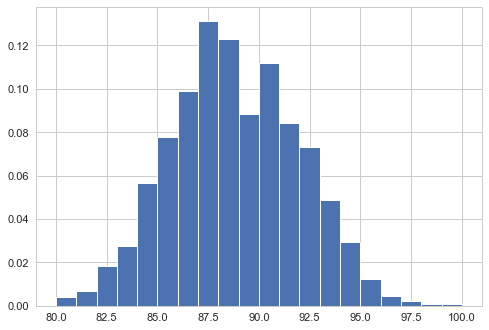

In [64]:
plt.figure()
plt.hist(eda['points'], bins = 20, density=True);

<AxesSubplot:xlabel='points', ylabel='price'>

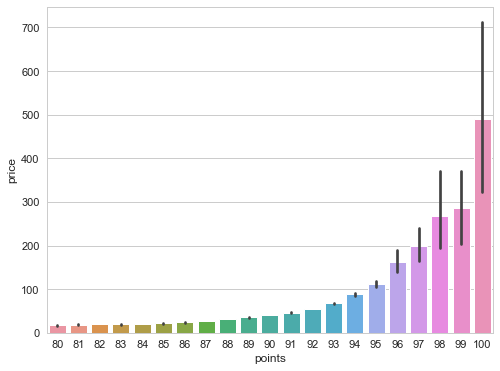

In [65]:
#barplot
plt.figure(figsize=(8, 6))
sns.barplot(x=eda.points,y=eda.price, data=eda)

**Conclusion** Se encuentra que el costo de los vinos tiene cierta correlación con la calidad, sin embargo, se pueden ver vinos ed muy buena calidad con precios inferiores a los USD $250

<AxesSubplot:xlabel='points', ylabel='price'>

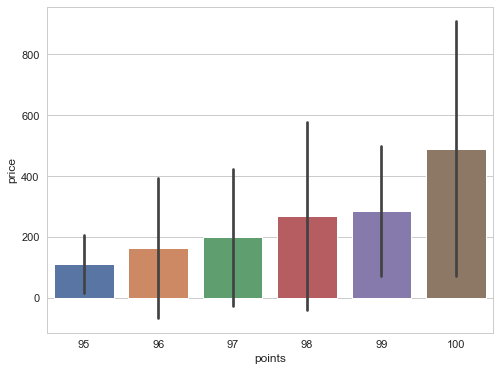

In [66]:
plt.figure(figsize=(8, 6))
sns.barplot(x=rango.points,y=rango.price, ci=  'sd', data=rango)

**Conclusion** Para los vinos con calificación por encima de 95, se encuentra que el comportamiento de precios es silimar, tiene cierta correlación.

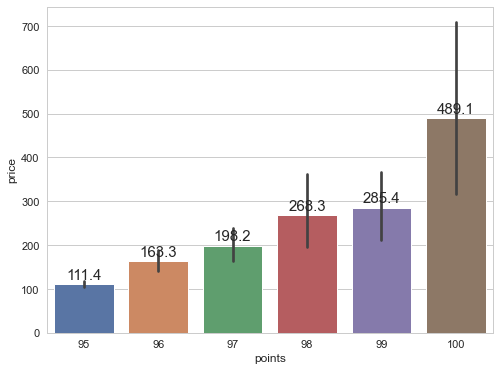

In [68]:
plt.figure(figsize=(8, 6))
splot = sns.barplot(x=rango.points,y=rango.price, data=rango)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (0, 9), 
                   textcoords = 'offset points')

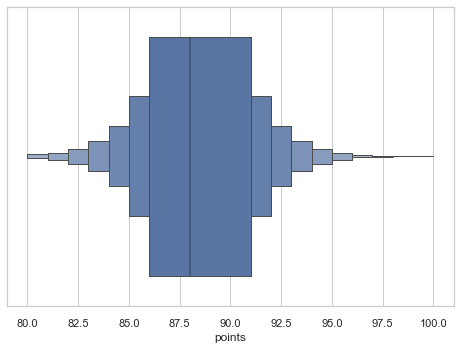

In [69]:
sns.set_theme(style="whitegrid")
ax = sns.boxenplot(x=eda["points"])

**Conclusion** Se puede ver que los puntajes est{an distribuidos de forma uniforme, centrados principalmente entre los valores 85 y 91, los cuales son calificaciones medias-bajas

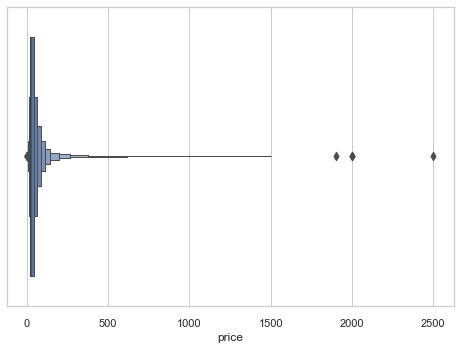

In [20]:
pricex = sns.boxenplot(x=eda["price"])

**Conclusion** En los precios de los vinos se encuentran algunos valores atípicos, con precios por encima de los 1500 dólares, pero no son datos corruptos.

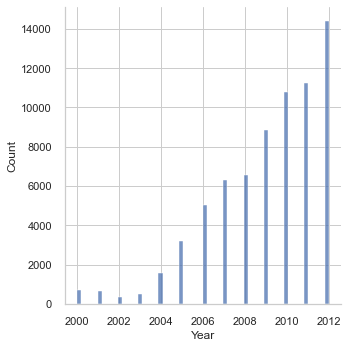

In [70]:
sns.displot(eda.Year)

**Conclusiones** Se tiene una distribución de vinos creciente en el paso del tiempo. Se ve cierta incongurencia en los años 2002 y 2003, por lo que es útil analizar que sucedió en estos años, además de un cambio en 2008, posiblemente por la crisis financiera de dicho año. 

[Text(0, 0.5, 'country')]

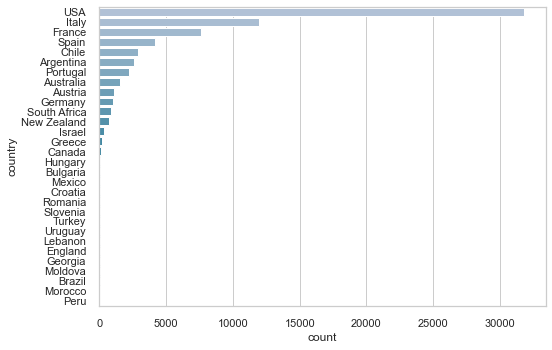

In [71]:
plot_data = eda.groupby('country').filter(lambda x : len(x)>10)
Appellation_Reg = sns.countplot(y="country",
                                data=plot_data, palette="PuBuGn_d", order = plot_data['country'].value_counts().index);
Appellation_Reg.set(ylabel='country')

Se encuentra que la mayoría de vinos calificados pertenecen a USA, la parte Oeste de Europa y el sur de sur américa

[Text(0, 0.5, 'taster_name')]

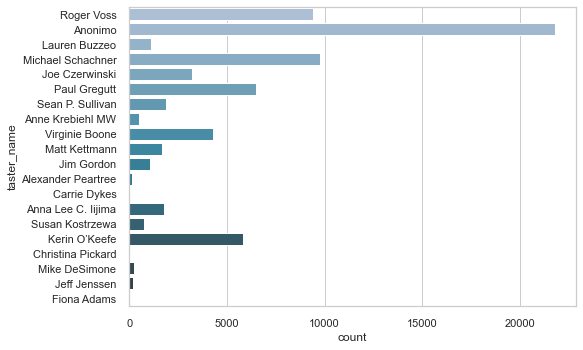

In [72]:
Appellation_Reg = sns.countplot(y="taster_name",  
data=eda, palette="PuBuGn_d");  
Appellation_Reg.set(ylabel='taster_name') 

**Conclusion** Se tienen múltiples cometarios de diversos catadores, pero las mayores calificaciones pertenecen a "anónimos" o a Roger Voss, catador con más de 15 años de expriencia en la industria. 

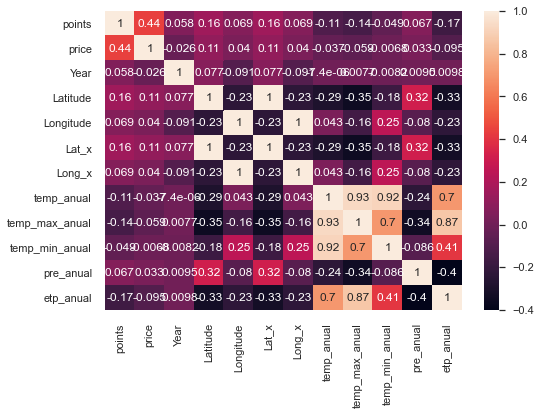

In [73]:
corrMatrix = eda.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

**Conclusiones** Entre las vairables más interesantes que se correlacionan, se encuentran:

*Puntos* Cierta correlación con el precio, una baja correlación con la Latitud y una correlación baja inversa con la temperatura anual máxima y evotranspiración anual.

*Precio* Cierta corrleación con la Latitud

*Año* No se encuentra correlación alguna

*Latitud* Alguna correlación inversa con la temperatura promedio y máxima, y una correlación con la precipitación anual

*Longitud* Alguna correlación con la temperatural anual y la temperatura mínima anual

*temp anual promedio* Correlación con la temperatura máxima anual y mínima anual, así como con la evotranspiración, y alguna correlación iversa con la Latitud

*temp max anual* Correlación con la temperatura mínima anual y la evotranspiración. Correlación iversa con la Latitud

*temp min anual* Alguna Correlación con la evotranspiración y Longitud

*Precipitación anual* Correlaciones con las Latitudes, y correlación inversa con la temperatura máxima

*evotranspiración anual* Correlacion inversa con la Latitud, y correlaciones con la temperatura anual promedio, temperaturas máximas y mínimas

In [74]:
corrMatrix

,points,price,Year,Latitude,Longitude,Lat_x,Long_x,temp_anual,temp_max_anual,temp_min_anual,pre_anual,etp_anual
points,1.000000,0.443441,0.057582,0.157017,0.069099,0.157063,0.068869,-0.105725,-0.141973,-0.048891,0.067081,-0.167274
price,0.443441,1.000000,-0.025715,0.112631,0.040287,0.112986,0.040129,-0.037202,-0.059463,-0.006789,0.032640,-0.094509
Year,0.057582,-0.025715,1.000000,0.077063,-0.091320,0.076942,-0.091383,-0.000007,0.007737,-0.008220,0.009484,0.009762
Latitude,0.157017,0.112631,0.077063,1.000000,-0.232018,0.999983,-0.232355,-0.287384,-0.346756,-0.175834,0.320665,-0.327855
Longitude,0.069099,0.040287,-0.091320,-0.232018,1.000000,-0.232271,0.999998,0.042631,-0.157482,0.253097,-0.080328,-0.226361
Lat_x,0.157063,0.112986,0.076942,0.999983,-0.232271,1.000000,-0.232609,-0.286721,-0.345893,-0.175501,0.319761,-0.326992
Long_x,0.068869,0.040129,-0.091383,-0.232355,0.999998,-0.232609,1.000000,0.043030,-0.157070,0.253419,-0.080449,-0.225938
temp_anual,-0.105725,-0.037202,-0.000007,-0.287384,0.042631,-0.286721,0.043030,1.000000,0.928979,0.915336,-0.235343,0.703796
temp_max_anual,-0.141973,-0.059463,0.007737,-0.346756,-0.157482,-0.345893,-0.157070,0.928979,1.000000,0.701294,-0.336853,0.866168
temp_min_anual,-0.048891,-0.006789,-0.008220,-0.175834,0.253097,-0.175501,0.253419,0.915336,0.701294,1.000000,-0.086442,0.412744


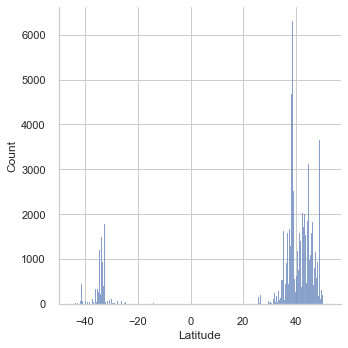

In [75]:
sns.displot(eda.Latitude)

**Conclusiones** La mayoría de calificaciones están principalmente en la zona sur -44° a -18° y entre 25° a 55°, esto es por que los vinos requieren de estaciones para poder desarrollar buenas propiedades de calidad

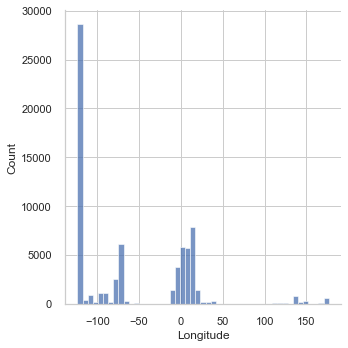

In [76]:
sns.displot(eda.Longitude)

**Conclusiones** Estan distribuidas en varias zonas, sin embargo, por el estudio y la cantidad de entradas de USA, se ve una cantidad mayor de datos hacia las Longitudes negativas, longitudes alrededor de 0 por la zona Oeste de Europa (España, Francia, Italia) y algunos datos de la zona Este por Australia y algunos vinos en Asia Oriental

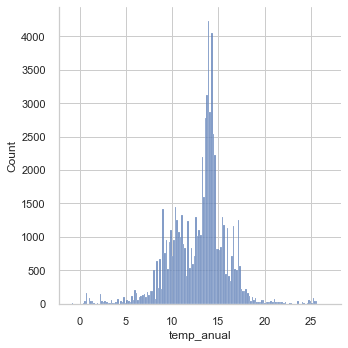

In [77]:
sns.displot(eda.temp_anual)

**Conclusiones** Se encuentra que el promedio de temperatura anual media est{a entre 13° y 18° centigrados, que tienden a ser areas calurosas pero no excesivamente calientes o frías 

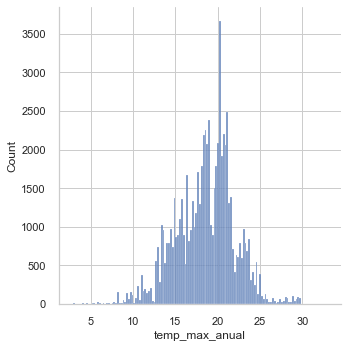

In [78]:
sns.displot(eda.temp_max_anual)

**Conclusiones** Las temperaturas máximas se encuentran alrededor de los 18° y 21° centigrados. Se encuentra que no se requiere un calor extremo, pero si elevado para las cosechas de vinos

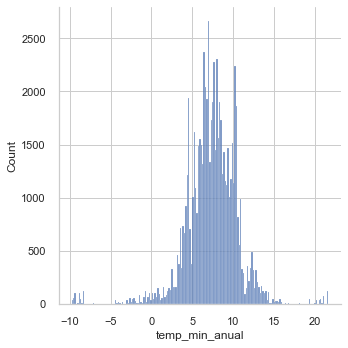

In [79]:
sns.displot(eda.temp_min_anual)

**Conclusiones** Se encuentra, nuevamente, que las temperaturas mínimas debe ser bajas pero no extremas. Se encuentran valores entre los 3° y 11° centigrados.

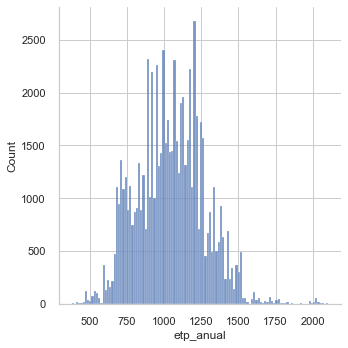

In [80]:
sns.displot(eda.etp_anual)

**Conclusiones** Los valores de evotranspiración anual se necuentran entre los 850 y 1250  evaporímetros. (pérdida de humedad de una superficie por evaporación directa junto con la pérdida de agua por transpiración de la vegetación)

In [81]:
plt.style.use('seaborn-whitegrid')

(array([5.0000e+00, 1.6390e+03, 8.6140e+03, 1.0547e+04, 8.4380e+03,
        7.2980e+03, 5.3340e+03, 5.1160e+03, 3.9900e+03, 3.5760e+03,
        2.8910e+03, 1.9270e+03, 1.7840e+03, 1.4470e+03, 9.8900e+02,
        1.2360e+03, 7.3400e+02, 6.1900e+02, 5.9500e+02, 4.0900e+02,
        4.6500e+02, 1.4400e+02, 2.0400e+02, 1.1200e+02, 1.9900e+02,
        2.7400e+02, 1.2600e+02, 1.1000e+02, 9.3000e+01, 7.9000e+01,
        1.9100e+02, 3.0000e+01, 4.9000e+01, 4.7000e+01, 2.6000e+01,
        6.5000e+01, 2.8000e+01, 1.2000e+01, 2.2000e+01, 1.0500e+02]),
 array([  0.,   5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.,
         55.,  60.,  65.,  70.,  75.,  80.,  85.,  90.,  95., 100., 105.,
        110., 115., 120., 125., 130., 135., 140., 145., 150., 155., 160.,
        165., 170., 175., 180., 185., 190., 195., 200.]),
 <BarContainer object of 40 artists>)

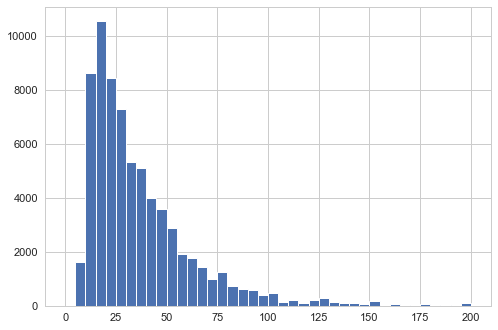

In [83]:
plt.hist(eda['price'], bins=40, range =(0,200) )#,  density=True) Comparar pero filtrando con vinos de calidad alta

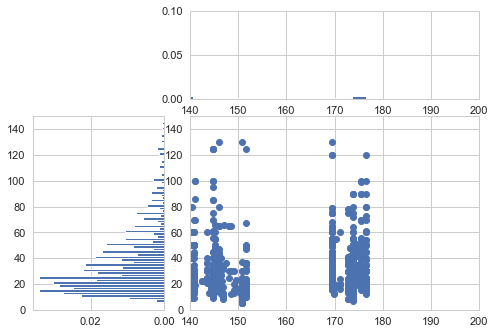

In [84]:
import matplotlib.gridspec as gridspec
plt.figure()
gridspec_ = gridspec.GridSpec(3, 3)

top_histogram = plt.subplot(gridspec_[0, 1:])
side_histogram = plt.subplot(gridspec_[1:, 0])
lower_right = plt.subplot(gridspec_[1:, 1:])

#PRICE VS LONGITUDE
Y_price = eda['price']
X_Longitude = eda['Longitude']

lower_right.scatter(X_Longitude, Y_price)
top_histogram.hist(X_Longitude, bins=100)
s = side_histogram.hist(Y_price, bins=100, orientation='horizontal')

# clear the histograms and plot normed histograms
top_histogram.clear()
top_histogram.hist(X_Longitude, bins=100, density=True)
side_histogram.clear()
side_histogram.hist(Y_price, bins=100, range =(0,200), orientation='horizontal', density=True)
# flip the side histogram's x axis
side_histogram.invert_xaxis()

# change axes limits
for ax in [top_histogram, lower_right]:
    ax.set_xlim(140, 200)
for ax in [side_histogram, lower_right]:
    ax.set_ylim(0, 150)

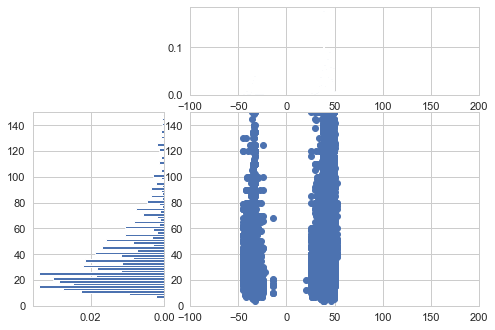

In [85]:
plt.figure()
gridspec_ = gridspec.GridSpec(3, 3)

top_histogram = plt.subplot(gridspec_[0, 1:])
side_histogram = plt.subplot(gridspec_[1:, 0])
lower_right = plt.subplot(gridspec_[1:, 1:])

#PRICE VS LATITUDE
Y_price = eda['price']
X_Latitude = eda['Latitude']

lower_right.scatter(X_Latitude, Y_price)
top_histogram.hist(X_Latitude, bins=100)
s = side_histogram.hist(Y_points, bins=100, orientation='horizontal')

# clear the histograms and plot normed histograms
top_histogram.clear()
top_histogram.hist(X_Latitude, bins=100, density=True)
side_histogram.clear()
side_histogram.hist(Y_price, bins=100, range =(0,200), orientation='horizontal', density=True)
# flip the side histogram's x axis
side_histogram.invert_xaxis()

# change axes limits
for ax in [top_histogram, lower_right]:
    ax.set_xlim(-100, 200)
for ax in [side_histogram, lower_right]:
    ax.set_ylim(0, 150)

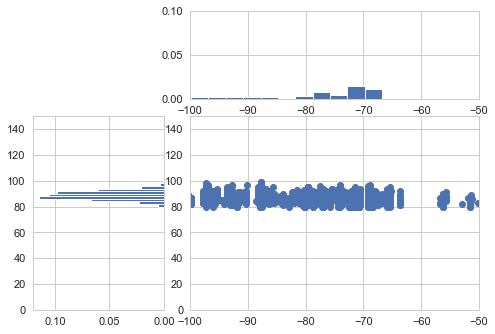

In [86]:
plt.figure()
gridspec_ = gridspec.GridSpec(3, 3)

top_histogram = plt.subplot(gridspec_[0, 1:])
side_histogram = plt.subplot(gridspec_[1:, 0])
lower_right = plt.subplot(gridspec_[1:, 1:])

#POINTS VS LONGITUDE
Y_points = eda['points']
X_Longitude = eda['Longitude']

lower_right.scatter(X_Longitude, Y_points)
top_histogram.hist(X_Longitude, bins=100)
s = side_histogram.hist(Y_points, bins=100, orientation='horizontal')

# clear the histograms and plot normed histograms
top_histogram.clear()
top_histogram.hist(X_Longitude, bins=100, density=True)
side_histogram.clear()
side_histogram.hist(Y_points, bins=100, range =(0,200), orientation='horizontal', density=True)
# flip the side histogram's x axis
side_histogram.invert_xaxis()

# change axes limits
for ax in [top_histogram, lower_right]:
    ax.set_xlim(-100, -50)
for ax in [side_histogram, lower_right]:
    ax.set_ylim(0, 150)

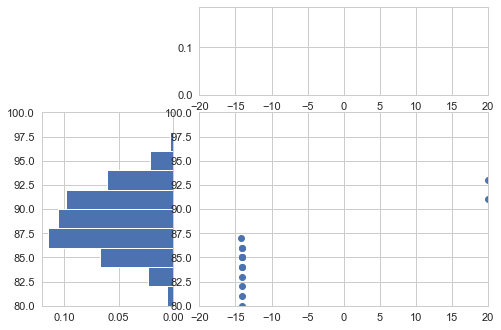

In [87]:
plt.figure()
gridspec_ = gridspec.GridSpec(3, 3)

top_histogram = plt.subplot(gridspec_[0, 1:])
side_histogram = plt.subplot(gridspec_[1:, 0])
lower_right = plt.subplot(gridspec_[1:, 1:])

#POINTS VS LATITUDE
Y_points = eda['points']
X_Latitude = eda['Latitude']

lower_right.scatter(X_Latitude, Y_points)
top_histogram.hist(X_Latitude, bins=100)
s = side_histogram.hist(Y_points, bins=100, orientation='horizontal')

# clear the histograms and plot normed histograms
top_histogram.clear()
top_histogram.hist(X_Latitude, bins=100, density=True)
side_histogram.clear()
side_histogram.hist(Y_points, bins=100, range =(0,200), orientation='horizontal', density=True)
# flip the side histogram's x axis
side_histogram.invert_xaxis()

# change axes limits
for ax in [top_histogram, lower_right]:
    ax.set_xlim(-20, 20)
for ax in [side_histogram, lower_right]:
    ax.set_ylim(80, 100)

(array([1.1000e+02, 7.0000e+00, 2.8000e+01, 5.2100e+02, 5.0000e+01,
        6.8000e+01, 6.4000e+01, 8.0000e+01, 1.5800e+02, 3.6900e+02,
        1.6980e+03, 2.1580e+03, 2.7490e+03, 9.4000e+01, 9.3000e+01,
        1.3600e+02, 3.0000e+01, 5.6000e+01, 1.0000e+00, 6.6000e+01,
        5.4000e+01, 2.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.2000e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.6000e+02, 2.11

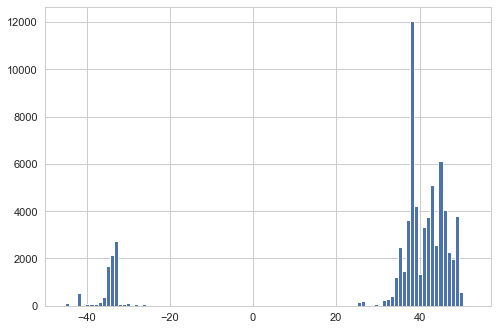

In [41]:
plt.hist(eda['Latitude'], bins=100)

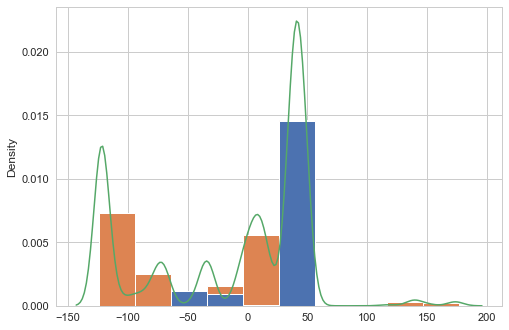

In [88]:
plt.figure()
plt.hist([eda.Latitude, eda.Longitude], histtype='barstacked', density=True);
v3 = np.concatenate(([eda.Latitude, eda.Longitude]))
sns.kdeplot(v3);

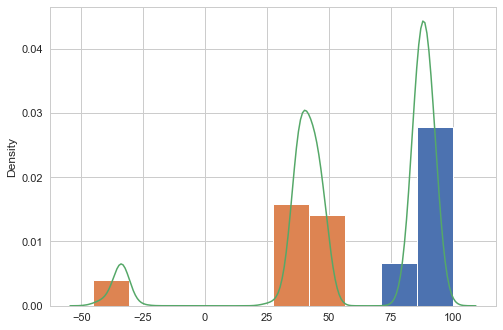

In [89]:
plt.figure()
plt.hist([eda.points, eda.Latitude], histtype='barstacked', density=True);
v3 = np.concatenate(([eda.points, eda.Latitude]))
sns.kdeplot(v3);

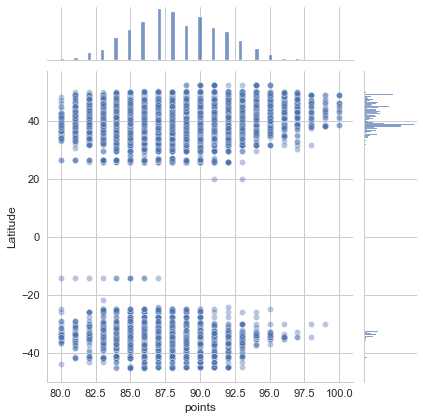

In [90]:
sns.jointplot(x=eda.points,y=eda.Latitude, alpha=0.4);

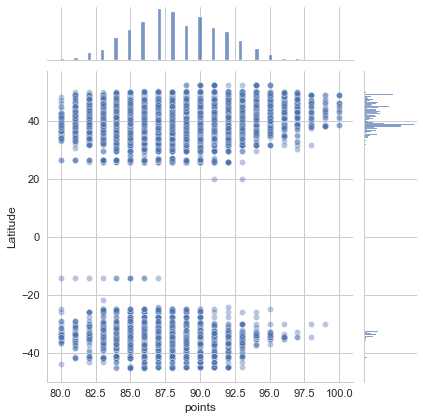

In [91]:
sns.jointplot(x=eda.points,y=eda.Latitude, alpha=0.4);

# Histrogramas

### Latitudes Vs. Puntajes

Se utilizará, basandose en la ley de pareto, las calificaciones del 20% de los mejores vinos. Para esto, como los vinos son calificados de 80 a 100, el 20% es el puntaje de 96 a 100. Con esta información, separamos las diferentes zonas de Latitudes con respecto a los trópicos, los cuales determinan las zonas de calor.

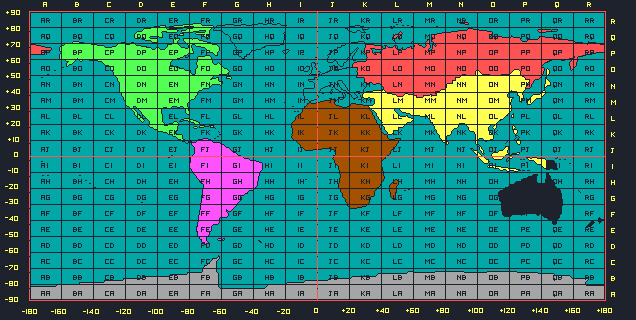

Con esto, realizamos el cruce gráfico de estas zonas, buscando ciertas conclusiones sobre las zonas geográficas contra la calidad de los vinos. No se graficarán datos sobre los círculos árticos y antárticos ya que no se encuentra información en nuestra base de datos de algún vino en estas zonas 

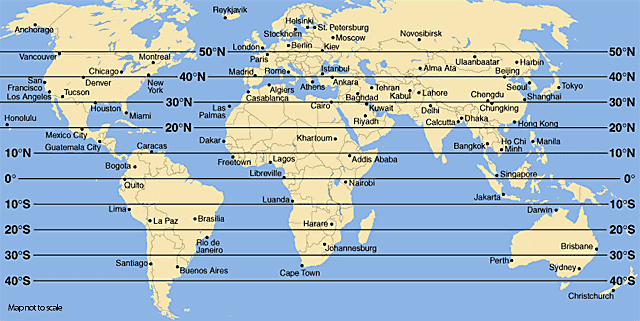

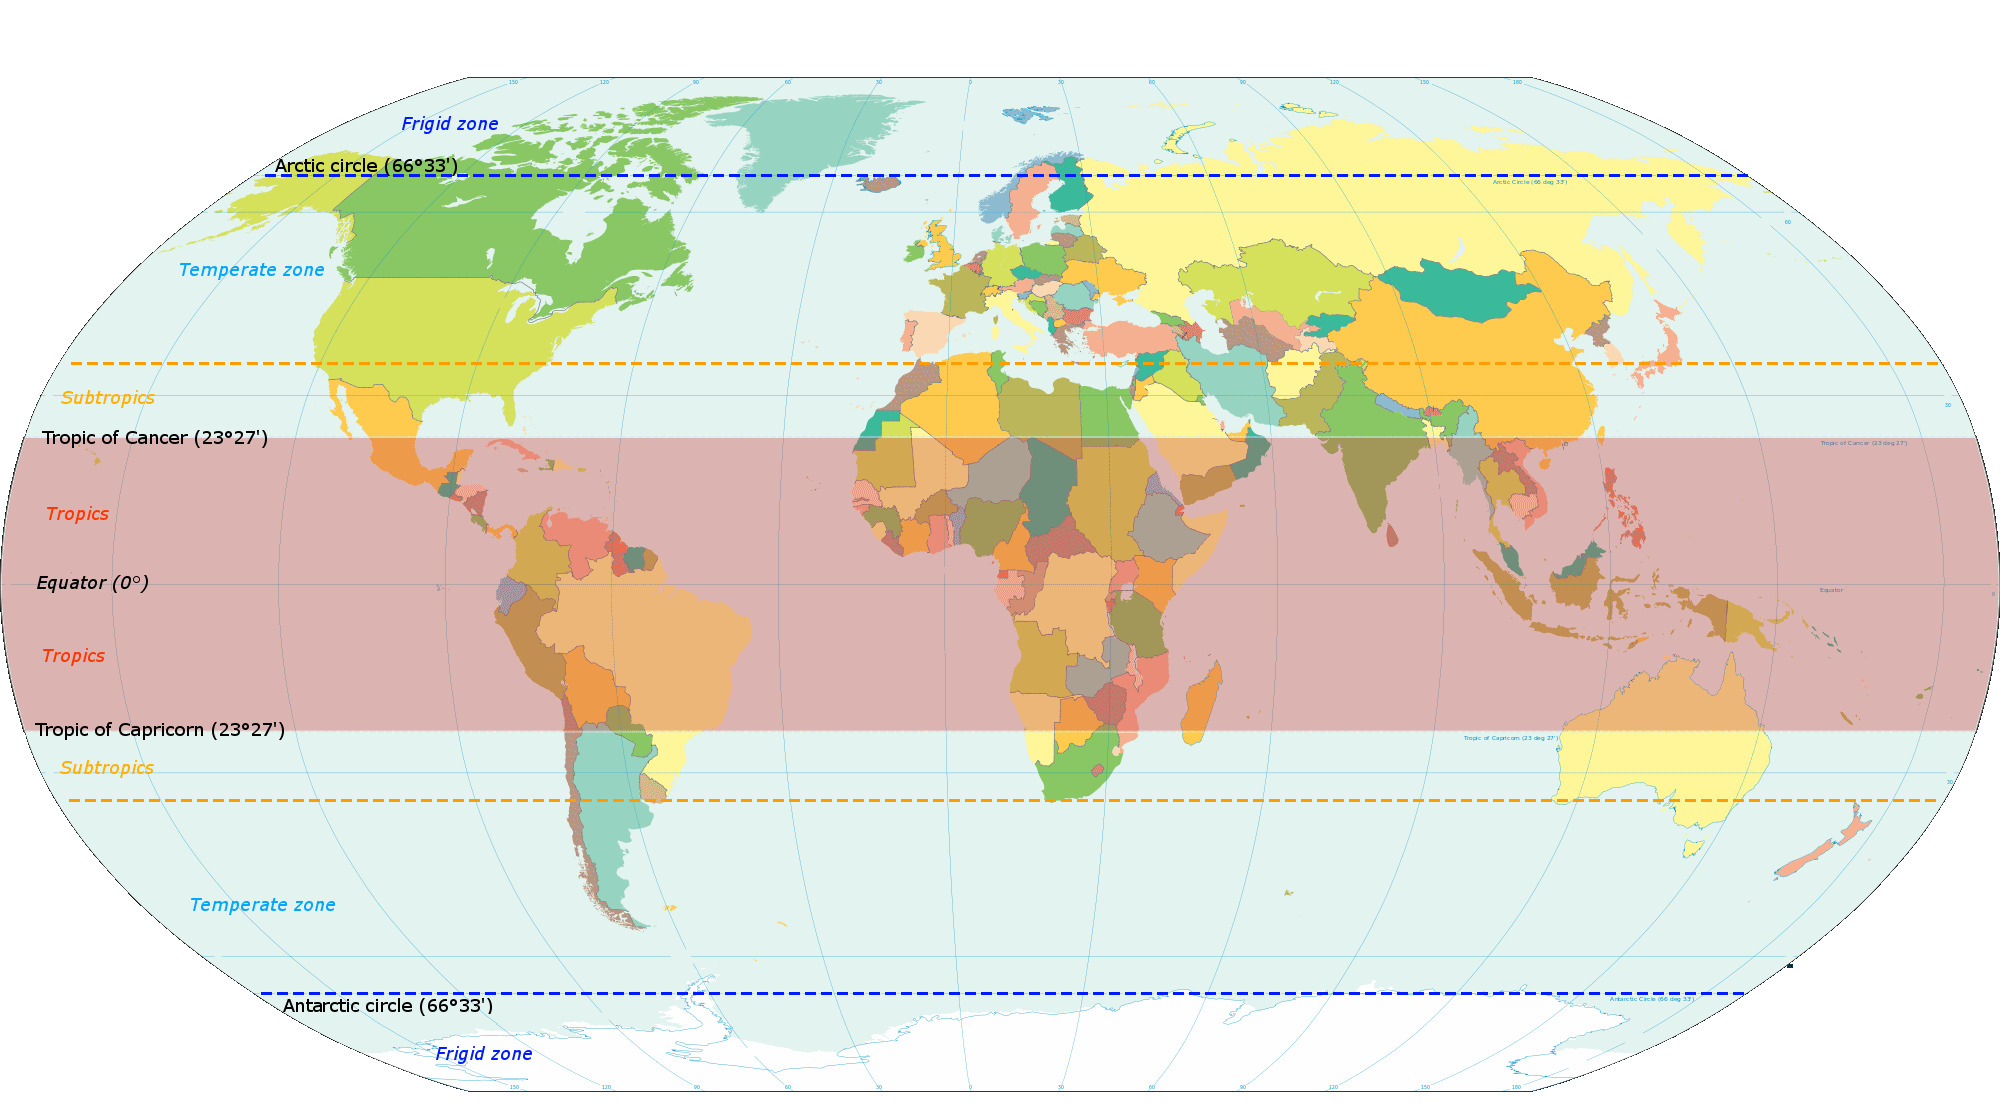

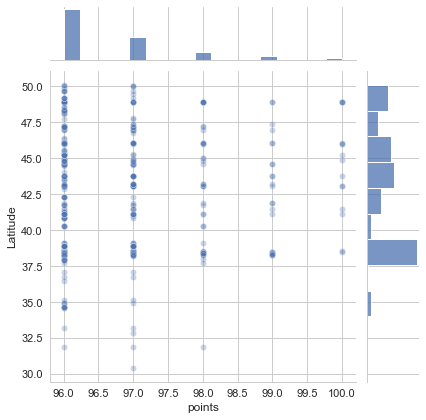

In [47]:
#Trópico de Cancer
df = eda[(eda.points>95) & (eda.Latitude>23.5)]
sns.jointplot(x=df.points,y=df.Latitude, alpha=0.3);

**Conclusion** Se encuentra una mayor concentración de vinos de buena calidad en las latitudes cercanas a los 38°, 44°, 45° y 46°; esta característica tambien se puede percibir ligeramente con los vinos de puntaje 99 y 100, con buenos vinos en los 49°

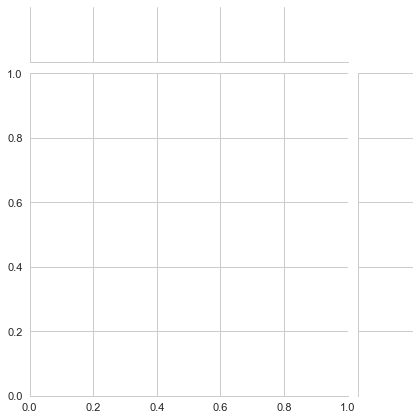

In [49]:
#Ecuador Norte
df = eda[(eda.points>95) & (eda.Latitude<23.5) & (eda.Latitude>0)]
sns.jointplot(x=df.points,y=df.Latitude, alpha=0.3);

**Conclusion** No se enceuntra ningún vino en esta zona. Esto muestra que la zona del Ecuador Norte no posee buenas zonas y/o condiciones para sembrar vinos

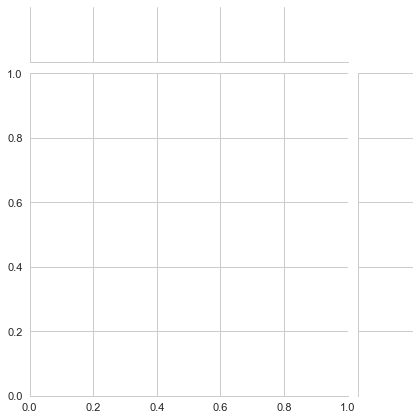

In [51]:
#Ecuador Sur
df = eda[(eda.points>95) & (eda.Latitude>-23.5) & (eda.Latitude<0)]
sns.jointplot(x=df.points,y=df.Latitude, alpha=0.3);

**Conclusion** No se encuentra ningún vino en esta zona. Esto muestra que la zona del Ecuador Norte no posee buenas zonas y/o condiciones para sembrar vinos

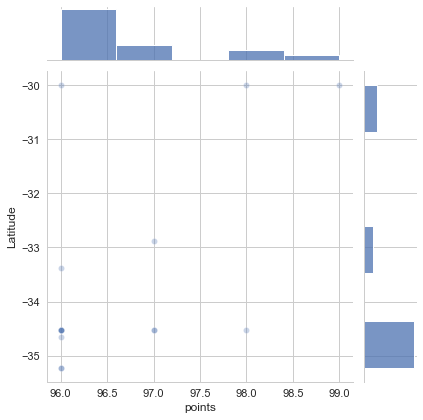

In [52]:
#Trópico de Capricornio
df = eda[(eda.points>95) & (eda.Latitude<-23.5) & (eda.Latitude>-66.5)]
sns.jointplot(x=df.points,y=df.Latitude, alpha=0.3);

**Conclusion** En este gráfico se encuentra un número bajo de calificaciones, debido a que la cantidad de muestras es mucho mayor en la zona norte a comparación de la zona sur. En este caso, se ve que los mejores vinos se encuentran alrededor de los -35°/-36° hacia el sur.

**Sería también correcto analizar las zonas con peores vinos? Creería que no ya que no es el objetivo de nuestro análisis**

### Longitudes Vs. Puntaje

Se realiza el análisis análogo al de Latitudes, esta vez no se tienen zonas para los meridianos, por lo que se separarán en las siguientes zonas:
1. Este USA (EU): -160° a -100°
2. Oeste USA y LATAM (OUL): -100° a -20°
3. Este Europa y Africa (EEA): -20° a 30°
4. Oeste Europa y Emiratos Árabes (OEEA): 30° a 70°
5. Asia y Oceanía (AO): 70° a 180°

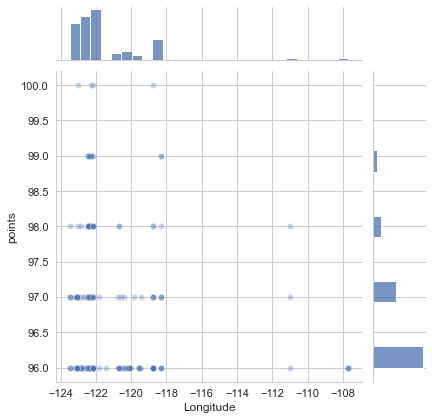

In [53]:
#Zona EU
df = eda[(eda.points>95) & (eda.Longitude>-160) & (eda.Longitude<=-100)]
sns.jointplot(x=df.Longitude,y=df.points, alpha=0.3);

**Conclusion** Los mejores vinos se dan en las Longitudes alrededor de los -123.5° y -118°, que comprende la región de California. Aunque hay algunos vinos en la zona de -111° a -107°, es interesante analizar zonas con buenas latitudes para zonas de siembra y producción, sobre todo en lugares con acceso a buenas fuentes hídricas u oceanos.

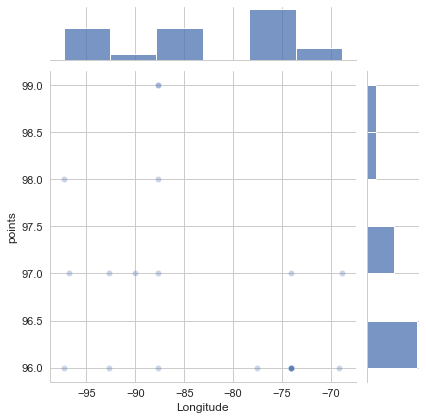

In [54]:
#Zona OUL
df = eda[(eda.points>95) & (eda.Longitude>-100) & (eda.Longitude<=-20)]
sns.jointplot(x=df.Longitude,y=df.points, alpha=0.3);

**Conclusion** Los mejores vinos se dan en múltiples longitudes, con concentración entre los -97° y -87°

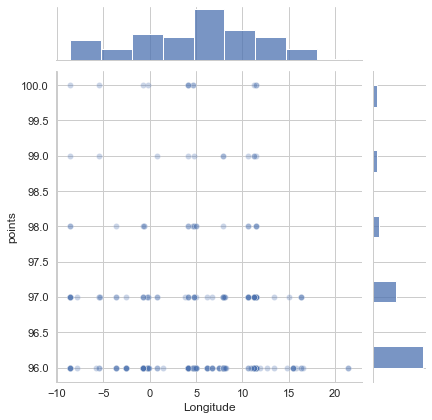

In [56]:
#Zona EEA
df = eda[(eda.points>95) & (eda.Longitude>-20) & (eda.Longitude<=30)]
sns.jointplot(x=df.Longitude,y=df.points, alpha=0.3);

**Conclusion** Los mejores vinos se encuentran distribuidos, con una mayor concentración entre los -9° y 12°, la cual es la zona comprendida para España, Francia e Italia.

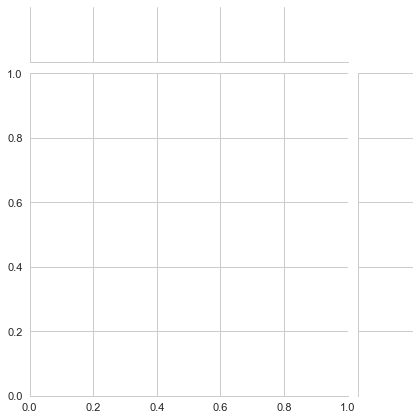

In [59]:
#Zona OEEA
df = eda[(eda.points>95) & (eda.Longitude>30) & (eda.Longitude<=70)]
sns.jointplot(x=df.Longitude,y=df.points, alpha=0.3);

**Conclusion** No se ecnontraron datos de esta zona.

,country,description,points,price,taster_name,variety,winery,Year,region,Latitude,Longitude,Lat_x,Long_x,temp_anual,temp_max_anual,temp_min_anual,pre_anual,etp_anual
32010,Australia,A throwback to the monster Shiraz style of old...,96,500.0,Joe Czerwinski,Shiraz,Penfolds,2004,"South Australia, Australia",-30.000232,136.209155,-30.25,136.25,20.69,27.73,13.68,153.3,1986
32021,Australia,This has all the size and weight you've come t...,98,850.0,Joe Czerwinski,Shiraz,Penfolds,2008,"South Australia, Australia",-30.000232,136.209155,-30.25,136.25,20.43,27.44,13.45,124.0,1980
32083,Australia,"This inky, embryonic wine deserves to be cella...",99,850.0,Joe Czerwinski,Shiraz,Penfolds,2010,"South Australia, Australia",-30.000232,136.209155,-30.25,136.25,19.83,26.43,13.27,213.2,1857
32265,Australia,"This full-bodied, muscular Shiraz is built for...",96,120.0,Joe Czerwinski,Shiraz,Kay Brothers,2012,"McLaren Vale, Australia",-35.221031,138.546125,-35.25,138.75,15.18,19.62,10.80,485.2,1221
32401,Australia,D'Arenberg's lineup of single-vineyard Shiraze...,96,85.0,Joe Czerwinski,Shiraz,D'Arenberg,2010,"McLaren Vale, Australia",-35.221031,138.546125,-35.25,138.75,14.78,19.69,9.91,669.1,1140
34803,Australia,This prodigious wine showcases Barossa's abili...,98,135.0,Joe Czerwinski,Shiraz,Standish,2006,"Barossa Valley, Australia",-34.533333,138.950000,-34.75,138.75,15.70,21.87,9.57,316.8,1302
34845,Australia,RWT (unromantically derived from “Red Wine Tri...,96,150.0,Joe Czerwinski,Shiraz,Penfolds,2009,"Barossa Valley, Australia",-34.533333,138.950000,-34.75,138.75,16.44,22.39,10.52,443.2,1338
34936,Australia,Winemaker Dave Powell is no longer with Torbre...,96,225.0,Joe Czerwinski,Shiraz-Viognier,Torbreck,2007,"Barossa Valley, Australia",-34.533333,138.950000,-34.75,138.75,16.50,22.50,10.55,452.5,1341
34965,Australia,"Despite this wine's weight and richness, it re...",96,110.0,Joe Czerwinski,Shiraz,Glaetzer,2010,"Barossa Valley, Australia",-34.533333,138.950000,-34.75,138.75,15.66,21.23,10.14,533.3,1245
34994,Australia,If Standish's Relic is the feminine side of Sh...,96,135.0,Joe Czerwinski,Shiraz,Standish,2005,"Barossa Valley, Australia",-34.533333,138.950000,-34.75,138.75,16.19,21.98,10.46,574.3,1296


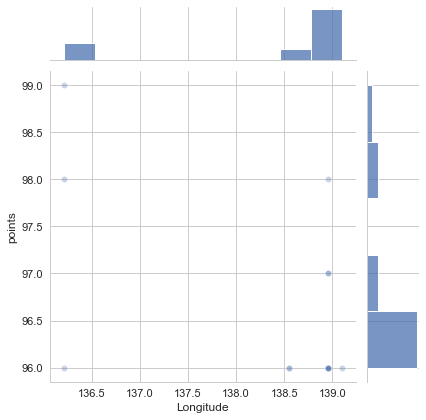

In [61]:
#Zona AO
df = eda[(eda.points>95) & (eda.Longitude>70) & (eda.Longitude<180)]
sns.jointplot(x=df.Longitude,y=df.points, alpha=0.3);
df

**Conclusion** Los datos encontrados hacen referencia a Australia, con la mayoría de vinos entre los 138° y 140°.